
# Project: Investigate Horror Movies from TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set in use for this analysis is a list of roughly 10,000 movies collected from The Movie Database (or TMDb) edited from origional data found on Kaggle.
> While several questions can be answered from this data set, such as Highest Revenue, yearly revenue averages, least and most popular films, etc, this analysis will be focusing on the horror movie genre.
> More specifically, we will seek to answer these questions:
> 1. Which horror movies are in the top and bottom 5 for revenue, and are those two things related.
> 2. Which directors produced the best horror moves by voting average.
> 3. Do horror movies get better with the years?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

#Quick View
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Things to note
### Reviewing the data above, there are a couple notes to make:
> 1. There are many columns such as website and cast that we will not need to use in our analysis
> 2. Vote count, which would affect averages, can differ greatly between movies. However, since we are using an average, this should not taint our analysis. 
> 3. Revenue is not specified as a currency, so the assumption made will be dollar amount.
> 4. Movies can be in multiple genres - for our analysis, anything that is tagged as a horror movie will be considered a horror movie, thrillers will not.


### Data Cleaning (Replace this with more specific notes!)

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
d = ['popularity', 'budget', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date','vote_count','budget_adj','revenue_adj']

df_small = df.drop(d,1)

#Make sure we only have what we need below:
print('Current Shape: ' + str(df_small.shape))
df_small.head()

Current Shape: (10866, 8)


,id,imdb_id,revenue,original_title,director,genres,vote_average,release_year
0,135397,tt0369610,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,tt1392190,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,tt2908446,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,tt2488496,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,tt2820852,1506249360,Furious 7,James Wan,Action|Crime|Thriller,7.3,2015


In [4]:
#Lets first clean the 0's out. We want to remove any missing values or 0 dollar values:
#We will want to convert any 0 values to NaN to later utalize the dropna function.

df_small = df_small.replace(0, np.NAN)

#then we will drop the null values

df_small.dropna(inplace = True)

print('New Shape: ' + str(df_small.shape))
print('This new data set is what we will be working with')

New Shape: (4849, 8)
This new data set is what we will be working with


In [5]:
#Last, lets get a Data Frame of only horror movies - We are skipping the H to avoid case issues.

df_horror = df_small[df_small['genres'].str.contains("orror")]

#lets see how that looks
df_horror.head()

,id,imdb_id,revenue,original_title,director,genres,vote_average,release_year
34,257445,tt1051904,150170815.0,Goosebumps,Rob Letterman,Adventure|Horror|Comedy,6.2,2015
62,310131,tt4263482,40423945.0,The Witch,Robert Eggers,Mystery|Horror,5.8,2015
79,263472,tt3605418,5214043.0,Knock Knock,Eli Roth,Drama|Horror|Thriller,4.8,2015
86,243688,tt1029360,95437994.0,Poltergeist,Gil Kenan,Horror|Thriller,5.0,2015
87,287424,tt1881002,187112.0,Maggie,Henry Hobson,Horror,5.1,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Starting Off Easy: Top and Bottom Horror Movies

First we will start with listing top and bottom movies based on revenue

In [6]:
df_hTop=df_horror.sort_values('revenue',axis=0,ascending=False)
df_hTop_simple=df_hTop[['original_title','revenue']]
print('Top 10 Horror Movies by Revenue Generated')
print(df_hTop_simple.head(10))
print('\nBottom 10 Horror Movies by Revenue Generated')
print(df_hTop_simple.tail(10))

Top 10 Horror Movies by Revenue Generated
          original_title      revenue
7392         I Am Legend  585349010.0
5445         World War Z  531865000.0
9806                Jaws  470654000.0
10594       The Exorcist  441306145.0
2643   The Mummy Returns  433013274.0
2413           The Mummy  415885488.0
2778            Hannibal  351692268.0
9613    Fatal Attraction  320145693.0
5438       The Conjuring  318000141.0
6974         Van Helsing  300257475.0

Bottom 10 Horror Movies by Revenue Generated
                             original_title  revenue
4667                     The Butterfly Room   1081.0
5637                 I Spit on Your Grave 2    809.0
9580                             Paperhouse    241.0
7901     Friday the 13th: The Final Chapter     32.0
10050    Tales from the Darkside: The Movie     16.0
8125                           The Prophecy     16.0
10294  Jason Goes to Hell: The Final Friday     15.0
8235                    Tales from the Hood     11.0
8523             

We will then list the top and bottom movies by voting average.

In [7]:
df_hTop=df_horror.sort_values('vote_average',axis=0,ascending=False)
df_hTop_simple=df_hTop[['original_title','vote_average']]
print('Top 10 Horror Movies by Voting average')
print(df_hTop_simple.head(10))
print('\nBottom 10 Horror Movies by voting average')
print(df_hTop_simple.tail(10))

Top 10 Horror Movies by Voting average
          original_title  vote_average
10141             Psycho           8.0
7310         The Shining           7.9
10472             Aliens           7.6
7825               Alien           7.6
9600        Evil Dead II           7.5
9988              Misery           7.5
8890           The Thing           7.5
6985   Shaun of the Dead           7.4
5438       The Conjuring           7.4
8268           Braindead           7.4

Bottom 10 Horror Movies by voting average
             original_title  vote_average
7482   I Know Who Killed Me           3.8
6315             BloodRayne           3.8
1739           Transylmania           3.7
2855                   Down           3.7
7969               Ghoulies           3.6
10521       King Kong Lives           3.5
6384      Alone in the Dark           3.5
5082      House of the Dead           3.4
4115             FearDotCom           3.3
4540             Dracula 3D           3.3


Wierd, doesn't look like a similar list in either, lets see if those two values are related with a scatterplot!

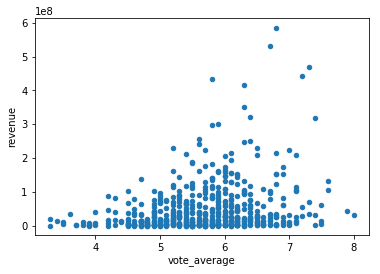

In [8]:
df_horror.plot.scatter('vote_average', 'revenue',);

Hmm, the above does show a very, very light uphill relationship, lets see if we can get any better results with the corralation coefficient.

In [9]:
df_horror[['vote_average','revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.260736
revenue,0.260736,1.000000


It's incredibly weak to say the least, less then .3. So while there is some positive corralation (as the vote is better, the revenue is better), it's not a very strong corralation. 

### Besides popularity, lets look at other factors to determin good horror movies.

In [10]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


First, we will see who made the best movies via vote averages. 

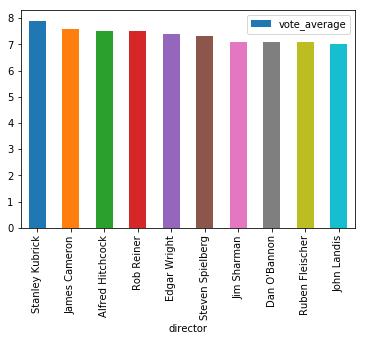

In [11]:
#first we will get some averages
df_horror_dm = df_horror.groupby('director', as_index=False)['vote_average'].mean()
#we really only want the top 10, so:
df_horror_dtop=df_horror_dm.sort_values('vote_average',axis=0,ascending=False).head(10)
#now lets view it a little easier with a bar graph.
df_horror_dtop.plot.bar('director','vote_average');

I wonder if the results will be similar with revenue.

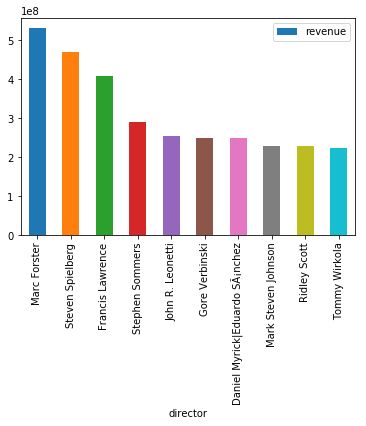

In [12]:
#first we will get some averages
df_horror_dm2 = df_horror.groupby('director', as_index=False)['revenue'].mean()
#we really only want the top 10, so:
df_horror_dtop2=df_horror_dm2.sort_values('revenue',axis=0,ascending=False).head(10)
#now lets view it a little easier with a bar graph.
df_horror_dtop2.plot.bar('director','revenue');


Doesn't look like there is a match between director and vote average and revenue either.

Let's see if the years have been kind to horror movies

,vote_average,release_year
vote_average,1.000000,-0.277188
release_year,-0.277188,1.000000


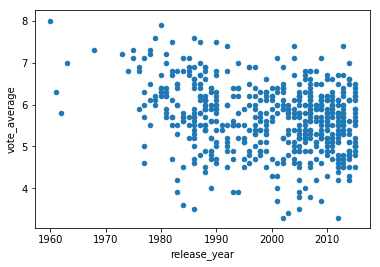

In [13]:
#Lets look at vote average first with a scatterplot and it's related corralation!
df_horror.plot.scatter('release_year','vote_average');
df_horror[['vote_average','release_year']].corr()

,vote_average,revenue
vote_average,1.000000,0.260736
revenue,0.260736,1.000000


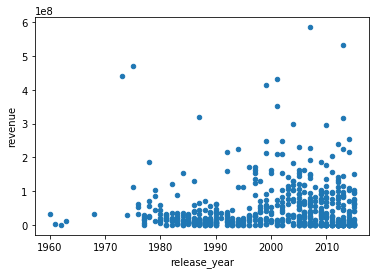

In [14]:
#Same with revenue
df_horror.plot.scatter('release_year','revenue');
df_horror[['vote_average','revenue']].corr()

Again, while there are definetly more movies in later years, quality doesn't seem to change much.

<a id='conclusions'></a>
## Conclusions

> This analysis overall goal was to see what features affected the quality of horror movies. We measured quality in realation to revenue generated and vote average. We checked those against directors and time. We even checked to see if vote average and revenue were related. A lot of features and considerations where left out while making this analysis. We did not account for number of votes, budget, or popularity as some pretty big omissions, however, the results of this analisys make a few things clear.
> 1. Vote Average does not greatly influence revenue
> 2. Horror movies have not gotten better with time, even though more have been made
> 3. A director does not need to make a well voted movie to make good revenue.
> 4. Psycho was a great movie!